#                                         Explore Titanic Dataset for Prediction of Survival 

"RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. " - Wikipedia 

Titanic is one of the most famous disaster in the human history. In this tragedy, many people were not survived but some of them did manager to live. While we will never forget about this event and the people who sacrifice their lives for others, it leaves us with valuable data that can be explored and through which we can understand it better. 

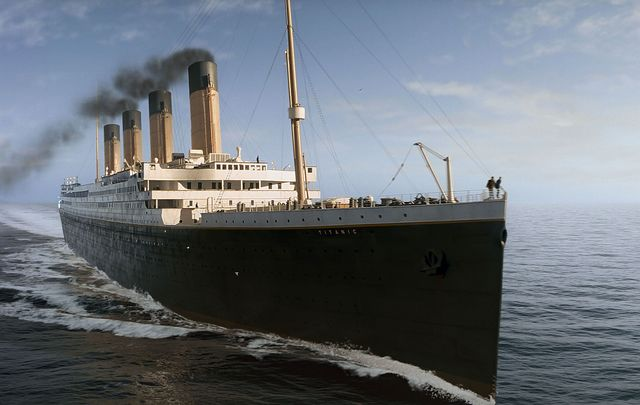

In this tutorial, we are going to do a step by step guide for how to end to end analysis for titanic dataset. The main
packages we are focusing on teaching are seaborn https://seaborn.pydata.org/ , XGBoost http://xgboost.readthedocs.io/en/latest/python/python_intro.html and scikitlearn http://scikit-learn.org/stable/. 
We will also be utilizing the pandas and matplotlib
packages for data processing and visulization. 


First we will do some data cleaning and processing of the dataset. Next we will be using seaborn and matplotlib to visualize the data. And finally we need to predict whether a person might survive or not using some classification models after we have done feature extraction. Sounds good? Let's get started!

### Content

[Data cleaning and processing](#3)


[Explore and visualization](#4)

[Features extraction for modeling](#5)

[Prediction using OLS, SVM and random forest](#6)

<a id= "3"></a>
### Data cleaning and processing

There are many variables in this dataset. Please read throught the dictionary before proceed to the next one!

Variable Description

Survived: Survived (1) or died (0)

Pclass: Passenger's class

Name: Passenger's name

Sex: Passenger's sex

Age: Passenger's age

SibSp: Number of siblings/spouses aboard

Parch: Number of parents/children aboard

Ticket: Ticket number

Fare: Fare

Cabin: Cabin

Embarked: Port of embarkation

#### Import and process the data using pandas. We will look at the whole dataset now and then divide it into train and test set. Drop unnecssary columns and see if there is any N/A values.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from xgboost import plot_importance
from numpy import loadtxt
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

sns.set_style('whitegrid')
%matplotlib inline

We need to first read the file. The test and train data are provided in this tutorial. 

In [2]:
titanic = pd.read_csv("/Users/xinpengzheng/Downloads/titanic.csv")
train = pd.read_csv("/Users/xinpengzheng/Downloads/train.csv")
test = pd.read_csv("/Users/xinpengzheng/Downloads/test.csv")
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
titanic = titanic.drop(['PassengerId','Name','Ticket'], axis=1)
train = train.drop(['PassengerId','Name','Ticket'], axis=1)
test = test.drop(['PassengerId','Name','Ticket'], axis=1)
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
Survived    1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
Age         1046 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Fare        1308 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 92.1+ KB


In [5]:
titanic["Embarked"] = titanic["Embarked"].fillna("S")  ##Fill missing values

<a id= "4"></a>
### Explore and visualization

We now want to draw a heatmap on correlation to see whether any variables are highly correlated.Here we can utilize corr() function and seaborn library to draw a heatmap that labels the correlation by colors.

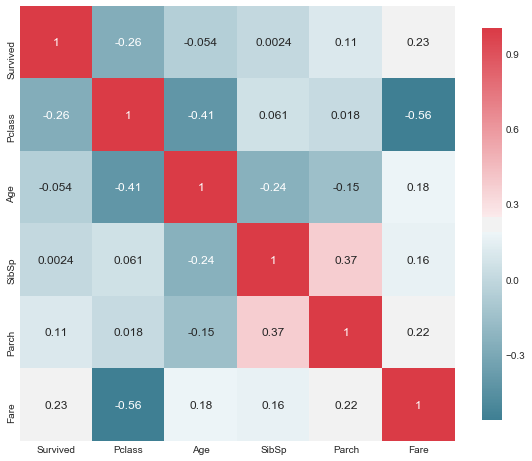

In [6]:
correlation = titanic.corr()
_ ,ax = plt.subplots(figsize =( 10 , 8 ))
map = sns.diverging_palette(220 , 10 , as_cmap = True)
sns.heatmap(correlation, cmap = map,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = {'fontsize' : 12 })

We will be using bar plot in the followings.
"A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars." https://seaborn.pydata.org/generated/seaborn.barplot.html 

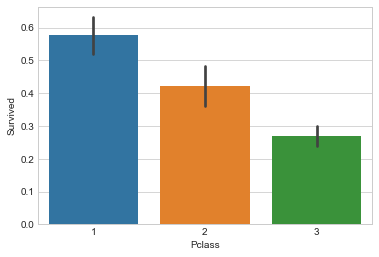

In [7]:
pclass = sns.barplot(x='Pclass', y='Survived', data=titanic)

We can now draw another graph to further illustrate the probability of survival given the ticket class. Using the facetgrid method we can see survival broken by pclass.

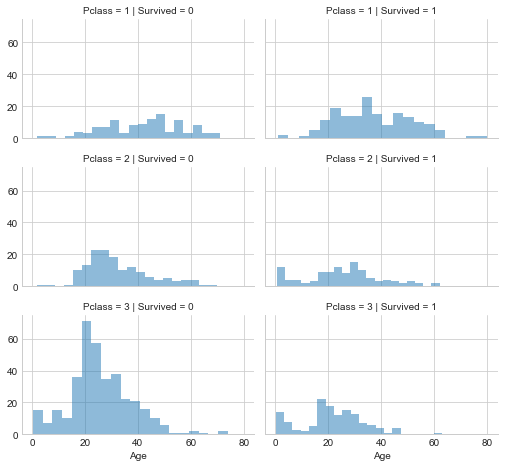

In [8]:
grid = sns.FacetGrid(titanic, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist,'Age', alpha=.5, bins=20)  
grid.add_legend()

The advantage of facegrid graph is that you can compare side by side: class1 consists mostly of middle to older age people while class2 and class3 have more younger people. In terms of survival, all of them seem to have a normal distribution.

What is the distribution of age in each class? We can plot it by using the plot function with kind = kde.

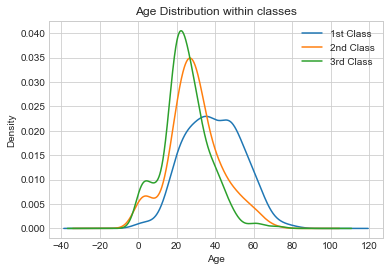

In [9]:
titanic.Age[titanic.Pclass == 1].plot(kind='kde')    
titanic.Age[titanic.Pclass == 2].plot(kind='kde')
titanic.Age[titanic.Pclass == 3].plot(kind='kde')
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best')

Some people on Titanic were with families (kids or sibilings). Did those who embark with families survive more or less than people who did not?

In [10]:
def get_relative(df):
    df['relatives'] = df['SibSp'] + df['Parch']
    df.loc[df['relatives'] > 0, 'alone'] = 0
    df.loc[df['relatives'] == 0, 'alone'] = 1
    df['alone'] = df['alone'].astype(int)
    
    return df

In [11]:
titanic = get_relative(titanic)
titanic.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,relatives,alone
0,0,3,male,22.0,1,0,7.2500,NaN,S,1,0
1,1,1,female,38.0,1,0,71.2833,C85,C,1,0
2,1,3,female,26.0,0,0,7.9250,NaN,S,0,1
3,1,1,female,35.0,1,0,53.1000,C123,S,1,0
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,1
5,0,3,male,NaN,0,0,8.4583,NaN,Q,0,1
6,0,1,male,54.0,0,0,51.8625,E46,S,0,1
7,0,3,male,2.0,3,1,21.0750,NaN,S,4,0
8,1,3,female,27.0,0,2,11.1333,NaN,S,2,0
9,1,2,female,14.0,1,0,30.0708,NaN,C,1,0


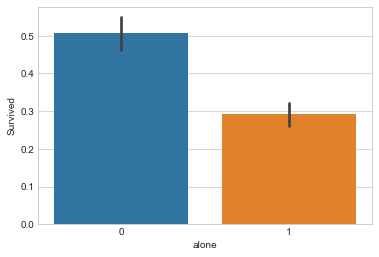

In [12]:
alone = sns.barplot(x='alone', y='Survived', data=titanic)

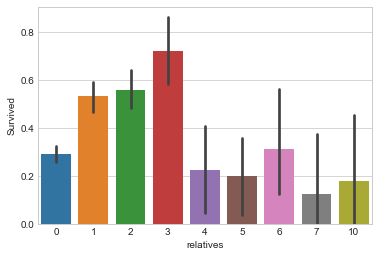

In [13]:
relatives = sns.barplot(x='relatives', y='Survived', data=titanic)

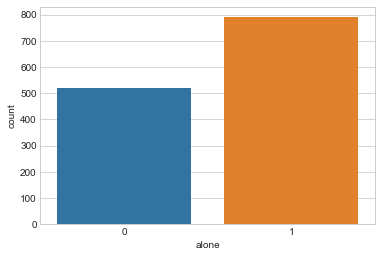

In [14]:
##countplot for basic summary
ax = sns.countplot(x="alone", data=titanic)

We can see that people with relatives onboard are more likely to survive than people who were not.More specifically, people who travelled with around 3 family members have the hight rate of survival.However, more than half of the people onboard were alone.

Let's end by understanding the variable importance. Here we introduce a new package called XGBoost. 

XGBoost is eXtreme gradient boosting. It is a package and library designed for optimized boosted tree algorithm. It's main goal is to push the extreme of the computation limits of machines to provide a scalable, portable and accurate for large scale tree boosting.Read the documentation and article here if you are interested in the details of how to use it and where you can apply the technics.

Documentation: http://xgboost.readthedocs.io/en/latest/python/python_intro.html

XGBoost with scikit-learn: https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/

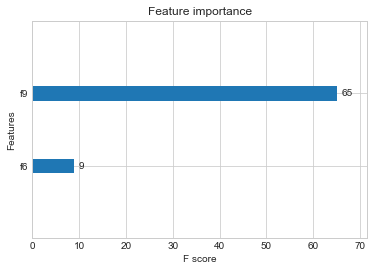

In [15]:
#Convert all values to float 
l1 = list(titanic.columns.values)
for s in l1:
    titanic[s] = pd.to_numeric(titanic[s], errors='coerce').fillna(0.0).astype(float)
#l2 = list(test.columns.values)
titanic.to_csv('xgboost_titanic.csv', index=False)
dataset = loadtxt('xgboost_titanic.csv',delimiter=",",skiprows=1)
# split data into X and y
X = dataset[:,0:10]
y = dataset[:,10]
# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# plot feature importance
plot_importance(model)
plt.show()

It looks like feature9(relatives) and feature6(Fare) are very important features that have great impact on the survival.

<a id= "5"></a>
### Features extraction for modeling

So far we have explored some variables in the dataset. Next we want to create features before we start our modeling.The following process has brorrowed some inspirations from: https://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html Here we start to use the train and test dataset instead of the whole dataset.

In [16]:
##Write a process function to process the necessary columns such as cabin, relative and etc..
def process(df):
    
    ##Process the Cabin columns 
    df.Cabin.fillna('U', inplace=True)
    
    df['Cabin'] = df['Cabin'].map(lambda c : c[0])

    cabin_dummies = pd.get_dummies(df['Cabin'], prefix='Cabin')
    
    df = pd.concat([df,cabin_dummies], axis=1)
    
    df.drop('Cabin', axis=1, inplace=True)
    
    ##Process the Embarked column

    embark_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
    
    df = pd.concat([df,embark_dummies], axis=1)
    
    df.drop('Embarked', axis=1, inplace=True)
    
    ##Process the PClass column
    
    pclass_dummies = pd.get_dummies(df['Pclass'], prefix='Pclass')
    
    df = pd.concat([df,pclass_dummies], axis=1)
    
    df.drop('Pclass', axis=1, inplace=True)

    ##Process the relaitve column 

    df = get_relative(df)
    
    ##Process gender
    
    df['Sex'] = df['Sex'].map({'male':1,'female':0})
    
    ##Drop unused columns 
    
    df.drop('SibSp', axis=1, inplace=True)
    df.drop('Parch', axis=1, inplace=True)
    df.drop('Name', axis=1, inplace=True)
    df.drop('Ticket', axis=1, inplace=True)
    df.drop('PassengerId', axis=1, inplace=True)
    
    return df

In [17]:
train = pd.read_csv("/Users/xinpengzheng/Downloads/train.csv")
test = pd.read_csv("/Users/xinpengzheng/Downloads/test.csv")
train = process(train)
test = process(test)
train.drop('Cabin_T', axis=1, inplace=True)

##convert all to float type and fillna
l_train = list(train.columns.values)
for s in l_train:
    train[s] = pd.to_numeric(train[s], errors='coerce').fillna(0.0).astype(float)
l_test = list(test.columns.values)
for s in l_test:
    test[s] = pd.to_numeric(test[s], errors='coerce').fillna(0.0).astype(float)        

Now we finish tranforming non-numeric columns into numeric

In [18]:
train.head(10)

,Survived,Sex,Age,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_U,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,relatives,alone
0,0.0,1.0,22.0,7.2500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,38.0,71.2833,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,26.0,7.9250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,1.0,0.0,35.0,53.1000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,35.0,8.0500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
5,0.0,1.0,0.0,8.4583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
6,0.0,1.0,54.0,51.8625,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
7,0.0,1.0,2.0,21.0750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,0.0
8,1.0,0.0,27.0,11.1333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0
9,1.0,0.0,14.0,30.0708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


<a id= "6"></a>
### Prediction using stochastic gradient descent, random forest and k-nearest neighbor

Finally, we will be using scikt-learn library to build several models and compare their performances by calculating the accuracy.

In [19]:
Y_train = train["Survived"]
X_train = train.drop("Survived", axis=1)
X_test = test

Linear classifiers (SVM, logistic regression, a.o.) with SGD training.
This estimator implements regularized linear models with stochastic gradient descent (SGD) learning: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate)

In [20]:
sgd = linear_model.SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
sgd.score(X_train, Y_train)

accuracy_sgd = round(sgd.score(X_train, Y_train) * 100, 3)
print(round(accuracy_sgd,2,), "%")

60.49 %


Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.-Wikipedia
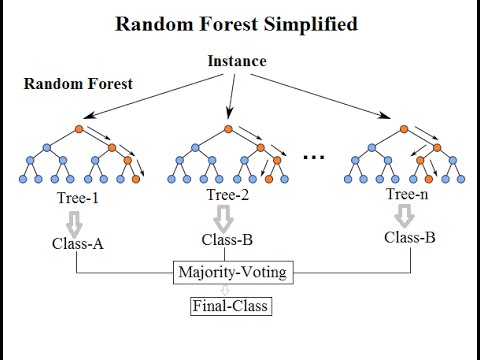

In [21]:
##Using random forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, Y_train)
Y_prediction = rf.predict(X_test)
rf.score(X_train, Y_train)

accuracy_rf = round(rf.score(X_train, Y_train) * 100, 3)
print(round(accuracy_rf,2,), "%")

98.65 %


Decision tree learning uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves). Tree models where the target variable can take a discrete set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. -Wikipedia
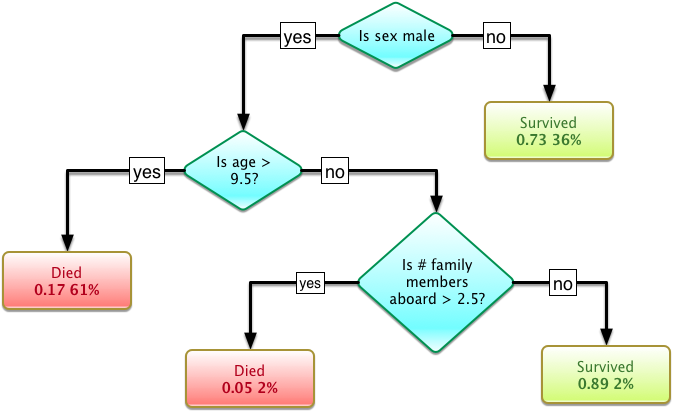

In [22]:
##Using decision tree
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
Y_prediction = dt.predict(X_test)
dt.score(X_train, Y_train)

accuracy_dt = round(dt.score(X_train, Y_train) * 100, 3)
print(round(accuracy_dt,2,), "%")

98.65 %


In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression.[1] In both cases, the input consists of the k closest training examples in the feature space.-Wikipedia
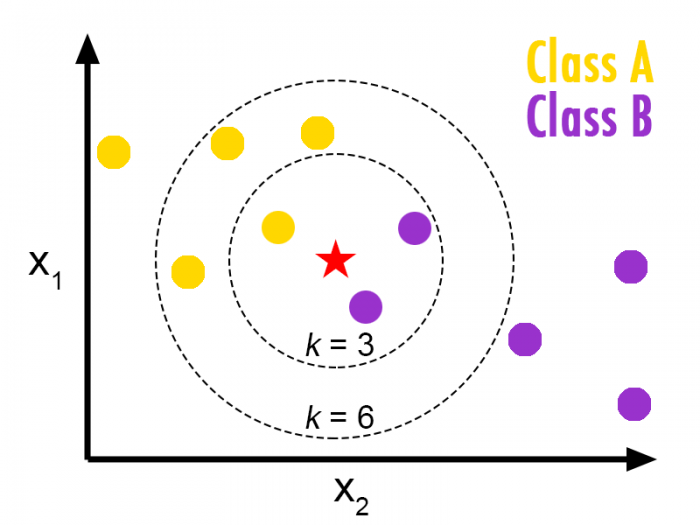

In [23]:
##Using K-nearest neignbor
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

accuracy_knn = round(knn.score(X_train, Y_train) * 100, 3)
print(round(accuracy_knn,2,), "%")

80.02 %


From the above models, we see that the decision tree and random forest gives us the best accuracy!